<a href="https://colab.research.google.com/github/veer2701/Classification-with-Python/blob/main/Extracting_Stock_Data_Using_a_Python_Library.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install yfinance
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


     |████████████████████████████████| 6.3 MB 9.2 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
apple = yf.Ticker("AAPL")

In [4]:
apple_info=apple.info
apple_info

{'52WeekChange': 0.34024727,
 'SandP52WeekChange': 0.23081124,
 'address1': 'One Apple Park Way',
 'algorithm': None,
 'annualHoldingsTurnover': None,
 'annualReportExpenseRatio': None,
 'ask': 161.82,
 'askSize': 800,
 'averageDailyVolume10Day': 111872230,
 'averageVolume': 81512325,
 'averageVolume10days': 111872230,
 'beta': 1.205714,
 'beta3Year': None,
 'bid': 161.74,
 'bidSize': 1300,
 'bookValue': 3.841,
 'category': None,
 'circulatingSupply': None,
 'city': 'Cupertino',
 'companyOfficers': [],
 'country': 'United States',
 'currency': 'USD',
 'currentPrice': 161.7099,
 'currentRatio': 1.075,
 'dateShortInterest': 1636934400,
 'dayHigh': 162.13,
 'dayLow': 157.8,
 'debtToEquity': 216.392,
 'dividendRate': 0.88,
 'dividendYield': 0.0053,
 'earningsGrowth': 0.662,
 'earningsQuarterlyGrowth': 0.622,
 'ebitda': 120233000960,
 'ebitdaMargins': 0.32867,
 'enterpriseToEbitda': 23.098,
 'enterpriseToRevenue': 7.592,
 'enterpriseValue': 2777165070336,
 'exDividendDate': 1636070400,
 'ex

In [5]:
apple_info['country']

'United States'

In [6]:
apple_share_price_data = apple.history(period="max")

In [10]:
apple_share_price_data.tail()

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
10327,10327,2021-11-26,159.570007,160.449997,156.360001,156.809998,76959800,0.0,0.0
10328,10328,2021-11-29,159.369995,161.190002,158.789993,160.240005,88748200,0.0,0.0
10329,10329,2021-11-30,159.990005,165.520004,159.919998,165.300003,174048100,0.0,0.0
10330,10330,2021-12-01,167.479996,170.300003,164.529999,164.770004,152052500,0.0,0.0
10331,10331,2021-12-02,158.735001,162.130005,157.800003,161.800003,69853649,0.0,0.0


In [11]:
apple_share_price_data.reset_index(inplace=True)
apple_share_price_data.tail()

,level_0,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
10327,10327,10327,2021-11-26,159.570007,160.449997,156.360001,156.809998,76959800,0.0,0.0
10328,10328,10328,2021-11-29,159.369995,161.190002,158.789993,160.240005,88748200,0.0,0.0
10329,10329,10329,2021-11-30,159.990005,165.520004,159.919998,165.300003,174048100,0.0,0.0
10330,10330,10330,2021-12-01,167.479996,170.300003,164.529999,164.770004,152052500,0.0,0.0
10331,10331,10331,2021-12-02,158.735001,162.130005,157.800003,161.800003,69853649,0.0,0.0


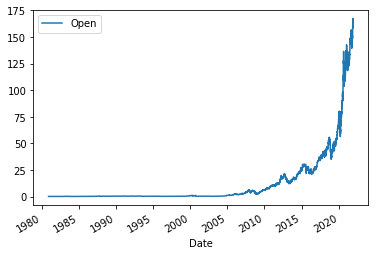

In [12]:
apple_share_price_data.plot(x="Date", y="Open")

In [13]:
apple.dividends

Date
1987-05-11    0.000536
1987-08-10    0.000536
1987-11-17    0.000714
1988-02-12    0.000714
1988-05-16    0.000714
                ...   
2020-11-06    0.205000
2021-02-05    0.205000
2021-05-07    0.220000
2021-08-06    0.220000
2021-11-05    0.220000
Name: Dividends, Length: 73, dtype: float64

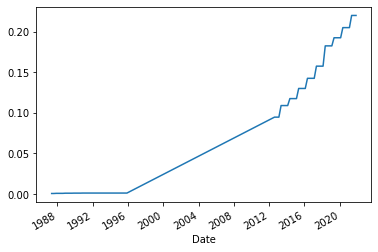

In [14]:
apple.dividends.plot()

In [15]:
# Extracting Stock Data Using a Web Scraping

In [17]:
!pip install bs4
import requests
from bs4 import BeautifulSoup

In [18]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/netflix_data_webpage.html"

data  = requests.get(url).text

In [19]:
soup = BeautifulSoup(data, 'html5lib')

In [20]:
netflix_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])

# First we isolate the body of the table which contains all the information
# Then we loop through each row and find all the column values for each row
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text
    
    # Finally we append the data of each row to the table
    netflix_data = netflix_data.append({"Date":date, "Open":Open, "High":high, "Low":low, "Close":close, "Adj Close":adj_close, "Volume":volume}, ignore_index=True)    

In [21]:
netflix_data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,"78,560,600",528.21
1,"May 01, 2021",512.65,518.95,478.54,502.81,"66,927,600",502.81
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,"111,573,300",513.47
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,"90,183,900",521.66
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,"61,902,300",538.85
